### Bank Term Deposit Subscription

**About dataset:**The dataset is from a bank, using which we have to predict whether the subject subscribes to a term deposit or not.<br/>

**Attributes:**
The dataset has the following attributes:<br/>
1  - age (numeric)<br/>
2  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services"). <br/>
3  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br/>
4  - education (categorical: "unknown","secondary","primary","tertiary")<br/>
5  - default: has credit in default? (binary: "yes","no")<br/>
6  - balance: average yearly balance, in euros (numeric) <br/>
7  - housing: has housing loan? (binary: "yes","no")<br/>
8  - loan: has personal loan? (binary: "yes","no")<br/>
9  - contact: contact communication type (categorical: "unknown","telephone","cellular") <br/>
10 - day: last contact day of the month (numeric)<br/>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br/>
12 - duration: last contact duration, in seconds (numeric)<br/>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br/>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client      was not previously contacted)<br/>  
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br/>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br/>
**Response Variable (desired target):**<br/>
17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

**Importing packages**

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.getcwd()

'E:\\Tech UpX\\Assignment - Linear, Logistic'

In [129]:
bank_data = pd.read_csv("bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Top 6 rows of dataset

**Let's see the datatypes of the variables**

In [130]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [131]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


**Observations:** <br/>
No. of rows: 4521, No.of columns: 17
        

**Descriptive statistics of numerical variables**

In [132]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**Observations:**Fortunately, there are no missing values.

**Missing values if any**

In [133]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Let's see how the numeric data is distributed**

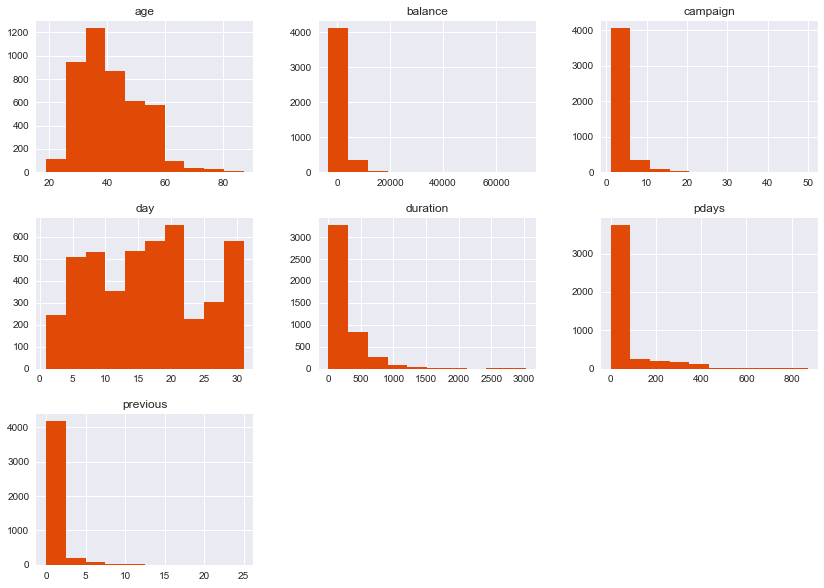

In [134]:
import matplotlib.pyplot as plt
bank_data.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

**Label Encoding**

In [135]:
from sklearn.preprocessing import LabelEncoder
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome','day','month','y']
bank_data[encoding_list] = bank_data[encoding_list].apply(LabelEncoder().fit_transform)

**Target Variable**

In [136]:
y = bank_data['y'].values
X = bank_data.drop('y',1)

**Exploratory Data Analysis**

**Correlation**

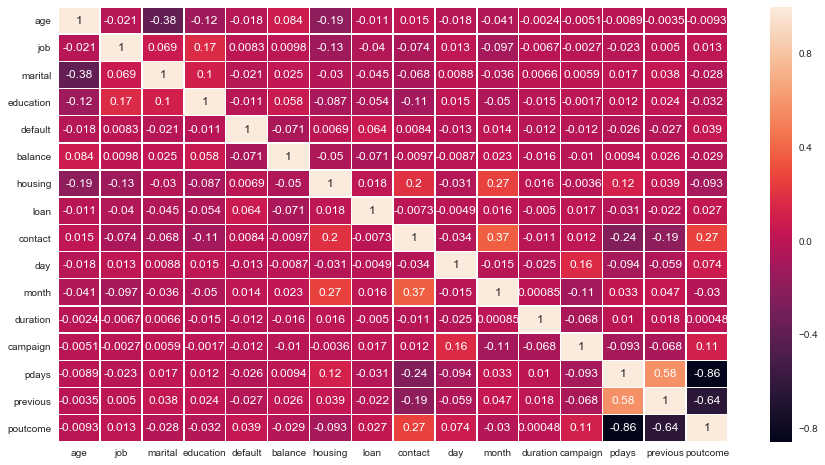

In [137]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, linewidth=0.5)
plt.show()

**Observations:** From the above graph, it is noted that pdays and previous are highly correlated to each other.

In [138]:
del X['pdays']
del X['previous']

**Let's see some plots to understand the data**

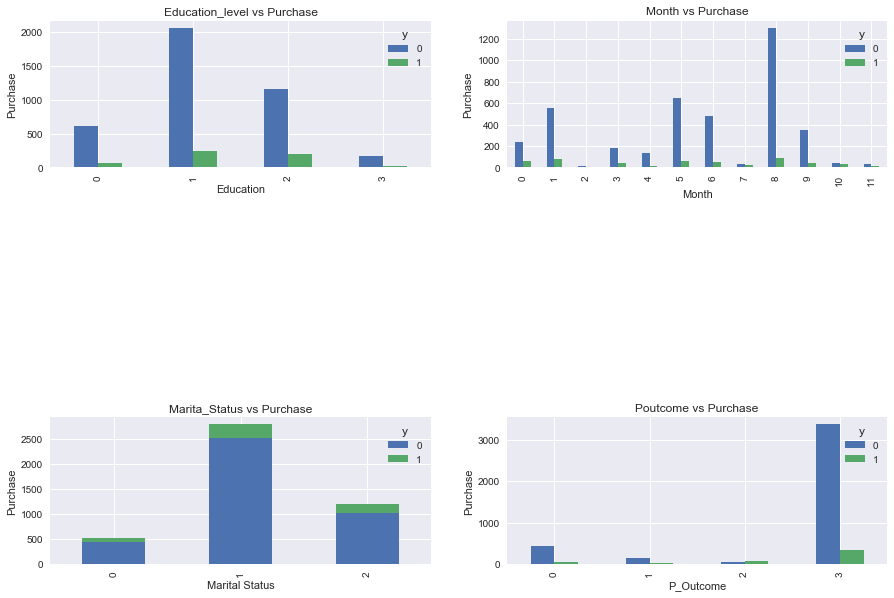

In [139]:
###plots for education, marital, month, poutcome 
fig,ax = plt.subplots(2,2,figsize = (15,10))
plt.subplots_adjust(wspace= .2,hspace=1.7)
edu = pd.crosstab(bank_data['education'],bank_data['y'])
edu.plot(ax=ax[0,0],kind='bar')
ax[0,0].set_title('Education_level vs Purchase')
ax[0,0].set_xlabel("Education")
ax[0,0].set_ylabel("Purchase")

month = pd.crosstab(bank_data['month'],bank_data['y'])
month.plot(ax=ax[0,1],kind='bar')
ax[0,1].set_title('Month vs Purchase')
ax[0,1].set_xlabel("Month")
ax[0,1].set_ylabel("Purchase")

marital = pd.crosstab(bank_data['marital'],bank_data['y'])
marital.plot(ax=ax[1,0],kind='bar',stacked=True)
ax[1,0].set_title('Marita_Status vs Purchase')
ax[1,0].set_xlabel("Marital Status")
ax[1,0].set_ylabel("Purchase")

poutcome = pd.crosstab(bank_data['poutcome'],bank_data['y'])
poutcome.plot(ax=ax[1,1],kind='bar')
ax[1,1].set_title('Poutcome vs Purchase')
ax[1,1].set_xlabel("P_Outcome")
ax[1,1].set_ylabel("Purchase")
plt.show()

**Data Partition**

In [140]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Logistic Regression**

In [146]:
#Logistice regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Predictions**

In [142]:
y_log_pred_test = logreg.predict(X_test)
y_log_pred_train = logreg.predict(X_train)

**Confustion Matrix**

In [143]:
metrics.confusion_matrix(y_test, y_log_pred_test)

array([[1195,    7],
       [ 133,   22]], dtype=int64)

**Train and Test accuracy**

In [144]:
print(metrics.accuracy_score(y_test, y_log_pred_test))#test accuracy
print(metrics.accuracy_score(y_train, y_log_pred_train))#train accuracy

0.896831245394
0.887168141593


**Classification report**

In [149]:
cl=classification_report(y_test,y_log_pred_test)
print(cl)

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      1202
          1       0.76      0.14      0.24       155

avg / total       0.88      0.90      0.86      1357

